# **Capstone Project - Fitbit Consumer Behavior Analysis**
## by Syed Omer Ali (https://www.linkedin.com/in/syed-omer-ali-a5ab82256/)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
daily_data = pd.read_csv("/content/drive/MyDrive/omer_8/Data/Daily_Data.csv")
heart_data = pd.read_csv("/content/drive/MyDrive/omer_8/Data/Heart_Data.csv")
hourly_data = pd.read_csv("/content/drive/MyDrive/omer_8/Data/Hourly_Data.csv")
minute_data = pd.read_csv("/content/drive/MyDrive/omer_8/Data/Minute_Data.csv")
sleep_data = pd.read_csv("/content/drive/MyDrive/omer_8/Data/Sleep_Data.csv")
weight_data = pd.read_csv("/content/drive/MyDrive/omer_8/Data/Weight_Data.csv")

## Exploratory Data Analysis (EDA)

Initial Data Inspection:

Check for missing values, data types, and get a basic understanding of the data.

In [4]:
print(daily_data.info())
print(hourly_data.info())
print(minute_data.info())
print(weight_data.info())
print(sleep_data.info())
print(heart_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   VeryActiveDistance        940 non-null    float64
 6   ModeratelyActiveDistance  940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   VeryActiveMinutes         940 non-null    int64  
 9   FairlyActiveMinutes       940 non-null    int64  
 10  LightlyActiveMinutes      940 non-null    int64  
 11  SedentaryMinutes          940 non-null    int64  
 12  Calories                  940 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 95.6+ KB
None
<c

In [5]:
print(daily_data.describe())
print(hourly_data.describe())
print(minute_data.describe())
print(weight_data.describe())
print(sleep_data.describe())
print(heart_data.describe())


                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
count          940.000000                940.000000           940.000000   
mean             1.502681                  0.567543             3.340819   
std              2.658941                  0.883580             2.040655   
min              0.000000                  0.000000             0.000000  

### Distribution of Daily Activity:

Plot histograms for steps, calories, and distance covered.

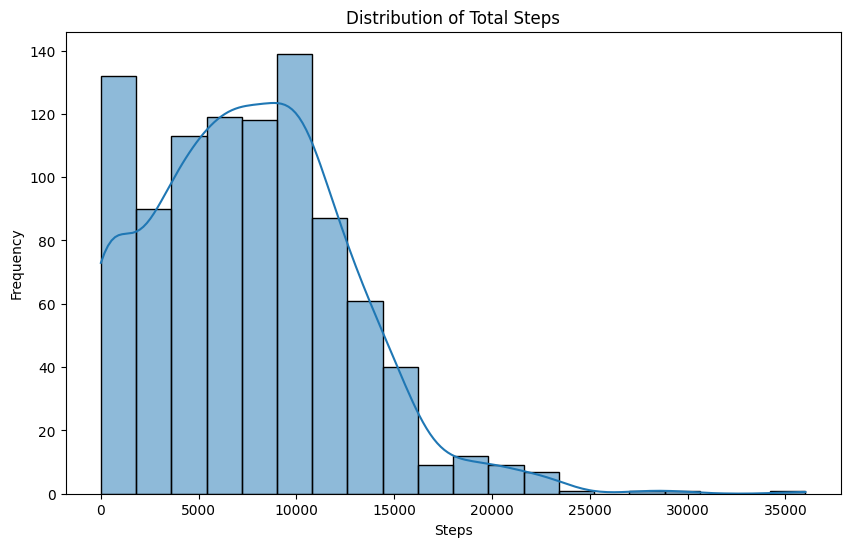

In [6]:
#histogram for steps
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['TotalSteps'], bins=20, kde=True)
plt.title('Distribution of Total Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

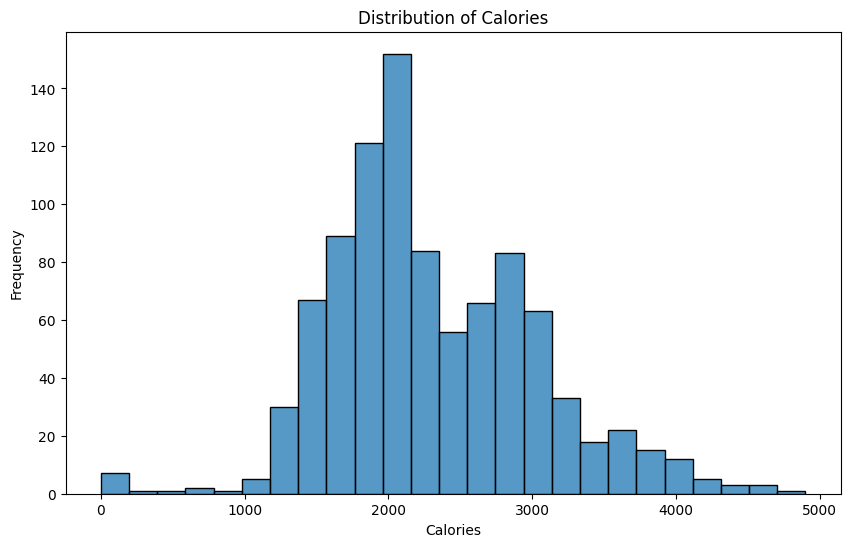

In [7]:
#histogram for calories
plt.figure(figsize=(10,6))
sns.histplot(daily_data["Calories"])
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

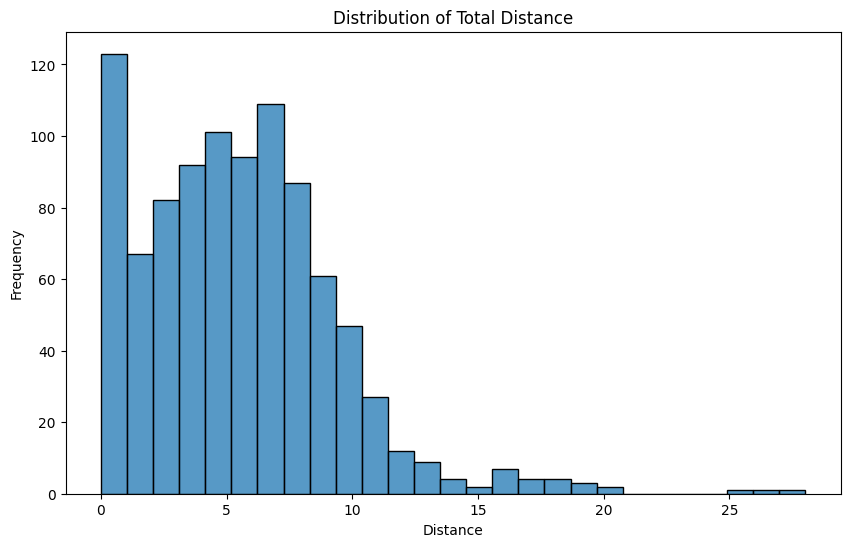

In [8]:
#histogram for Distance
plt.figure(figsize=(10,6))
sns.histplot(daily_data["TotalDistance"])
plt.title("Distribution of Total Distance")
plt.xlabel('Distance')
plt.ylabel("Frequency")
plt.show()

### Heart Rate Analysis:

Explore heart rate data to identify patterns or trends.

In [9]:
heart_data.head(5)

,Unnamed: 0,Id,Time,Value
0,0,2022484408,04/12/2016,97
1,1,2022484408,04/12/2016,102
2,2,2022484408,04/12/2016,105
3,3,2022484408,04/12/2016,103
4,4,2022484408,04/12/2016,101


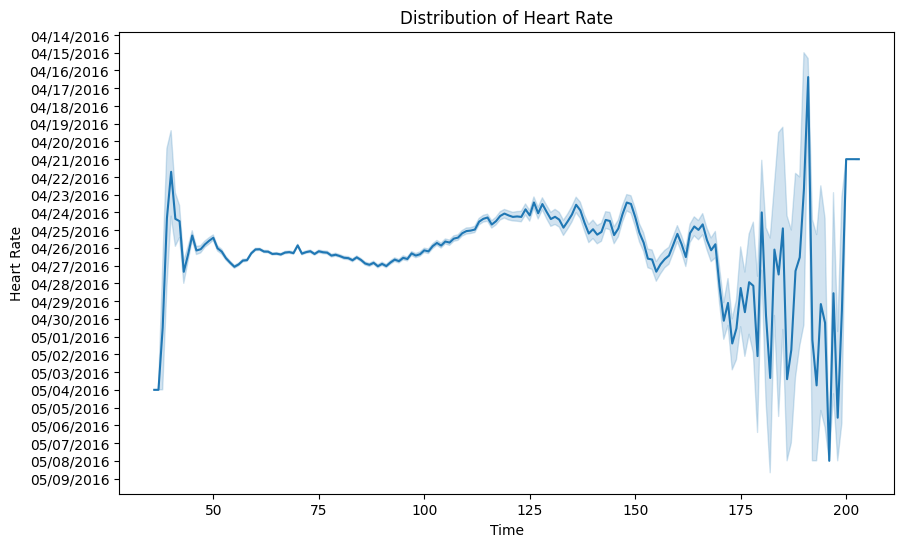

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(data = heart_data, x='Value',y="Time")
plt.title('Distribution of Heart Rate')
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.show()

### Sleep Patterns:

Analyze the sleep data for trends like sleep duration and sleep quality

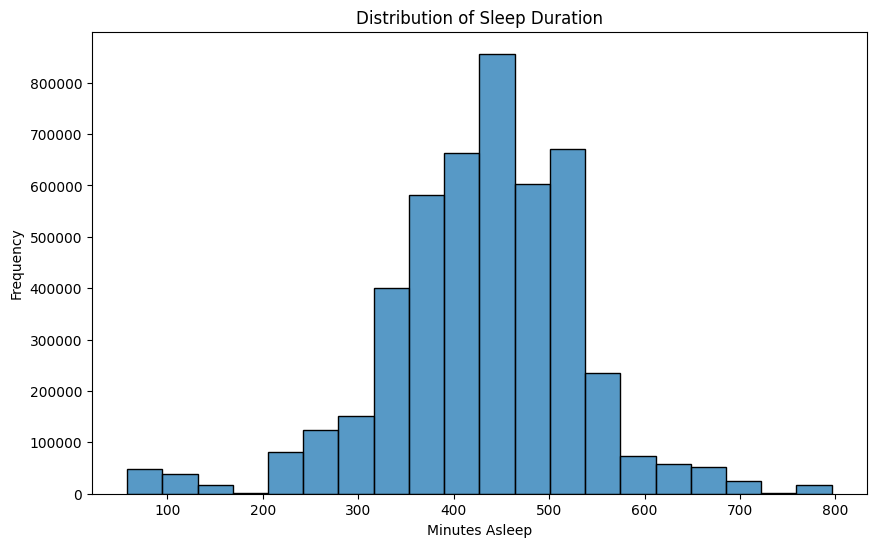

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(sleep_data['TotalMinutesAsleep'], bins=20)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Minutes Asleep')
plt.ylabel('Frequency')
plt.show()


### Correlation Analysis


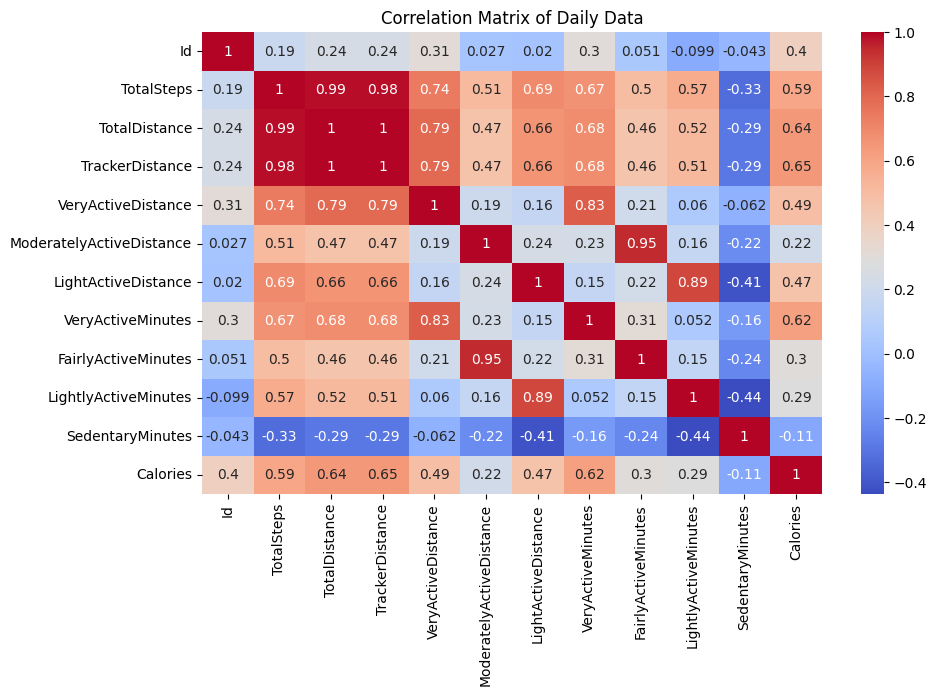

In [12]:
# Select only numeric columns for correlation matrix
numeric_data = daily_data.select_dtypes(["float64","int64"])
# using ofheat maps to show variations in the daily data
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Daily Data")
plt.show()

### Hourly Data


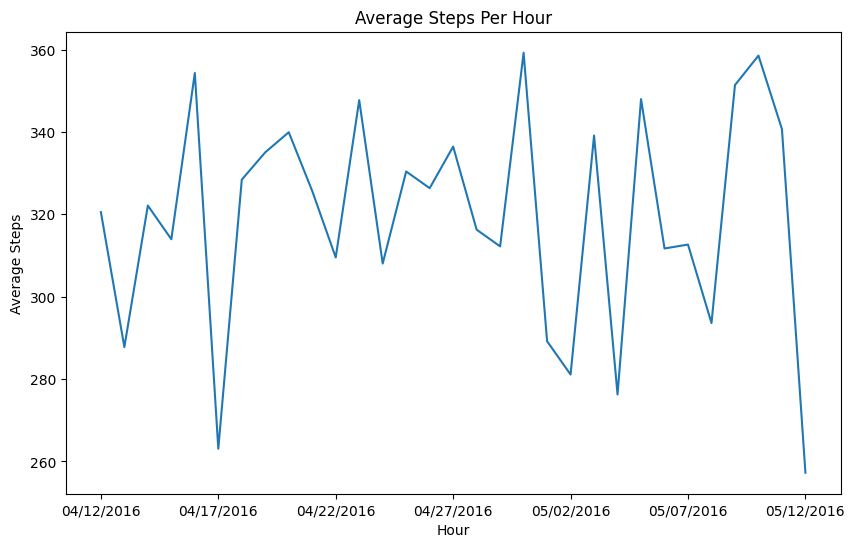

In [13]:
# Analyzing Steps per Hour
hourly_avg_steps = hourly_data.groupby('ActivityHour')['StepTotal'].mean()
hourly_avg_steps.plot(kind='line', figsize=(10, 6), title='Average Steps Per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Steps')
plt.show()



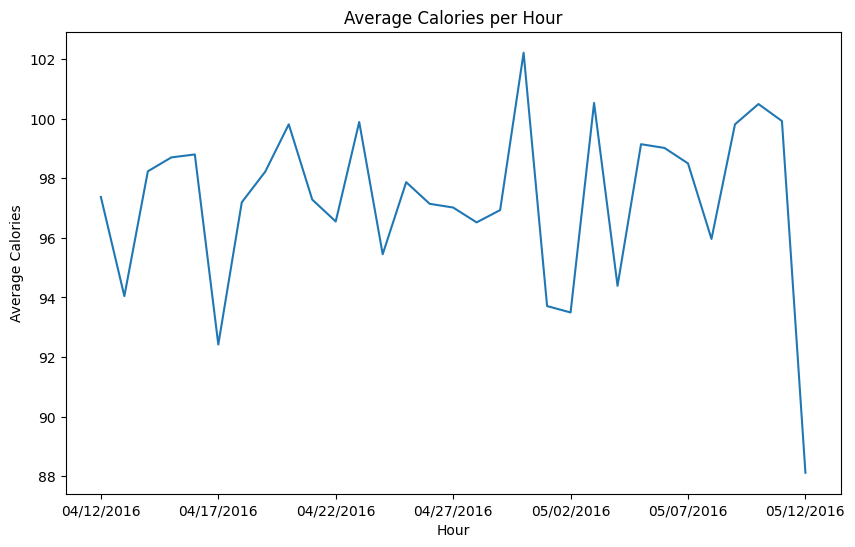

In [14]:
# Analyzing Calories per Hour
hourly_avg_calories = hourly_data.groupby('ActivityHour')['Calories'].mean()
hourly_avg_calories.plot(kind="line",figsize=(10,6),title="Average Calories per Hour")
plt.xlabel("Hour")
plt.ylabel("Average Calories")
plt.show()

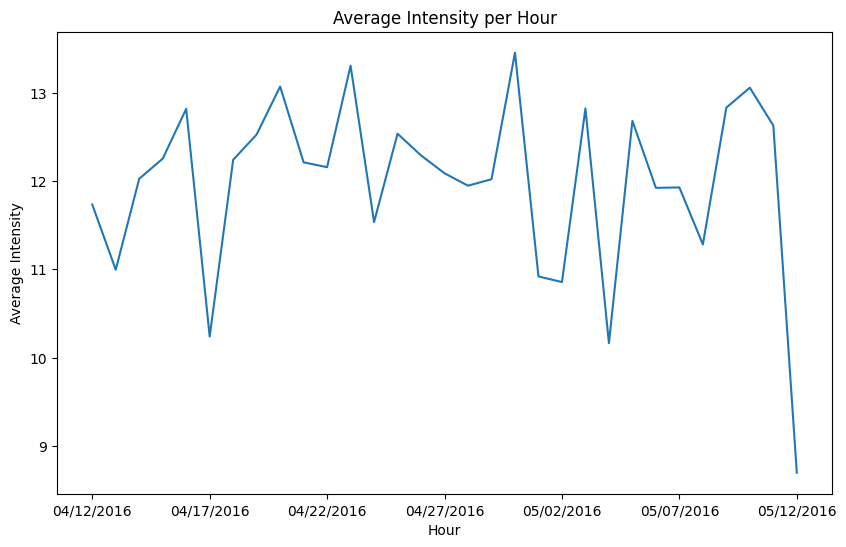

In [15]:
# Analyziing Total Intensity per Hour
hourly_avg_intensity = hourly_data.groupby("ActivityHour")['TotalIntensity'].mean()
hourly_avg_intensity.plot(kind="line", figsize=(10,6),title="Average Intensity per Hour")
plt.xlabel("Hour")
plt.ylabel("Average Intensity")
plt.show()

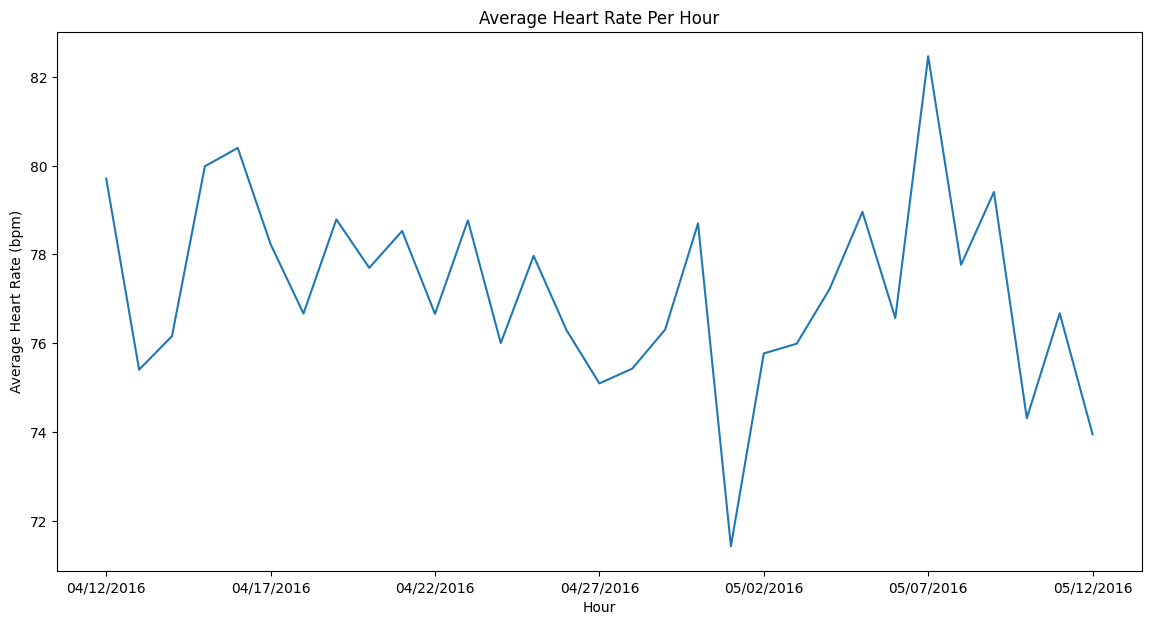

In [16]:
# Analyzing Average Heart Rate Per Hour
hourly_avg_hr = heart_data.groupby('Time')['Value'].mean()
hourly_avg_hr.plot(kind='line', figsize=(14, 7), title='Average Heart Rate Per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Heart Rate (bpm)')
plt.show()


### Sleep Data

In [17]:
sleep_data.head(5)

,Unnamed: 0,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,value,logId
0,0,1503960366,04/12/2016,1,327,346,4/12/2016 2:47:30 AM,3,11380564589
1,1,1503960366,04/12/2016,1,327,346,4/12/2016 2:48:30 AM,2,11380564589
2,2,1503960366,04/12/2016,1,327,346,4/12/2016 2:49:30 AM,1,11380564589
3,3,1503960366,04/12/2016,1,327,346,4/12/2016 2:50:30 AM,1,11380564589
4,4,1503960366,04/12/2016,1,327,346,4/12/2016 2:51:30 AM,1,11380564589


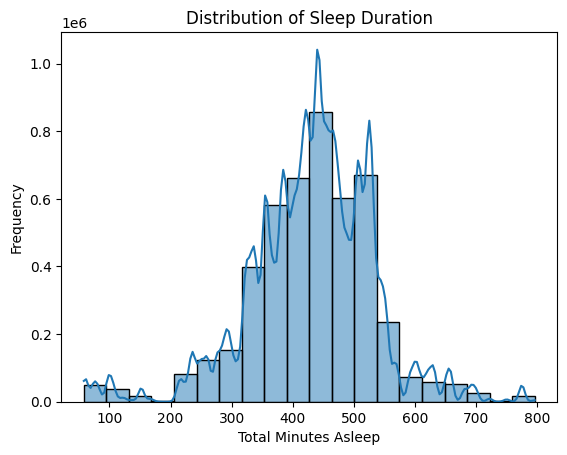

In [18]:
sns.histplot(sleep_data['TotalMinutesAsleep'], bins=20, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.show()


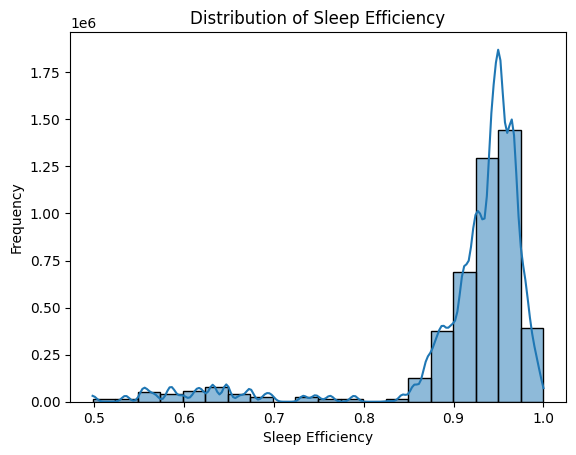

In [19]:
sleep_data['SleepEfficiency'] = sleep_data['TotalMinutesAsleep'] / sleep_data['TotalTimeInBed']
sns.histplot(sleep_data['SleepEfficiency'], bins=20, kde=True)
plt.title('Distribution of Sleep Efficiency')
plt.xlabel('Sleep Efficiency')
plt.ylabel('Frequency')
plt.show()
